In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# **Analiza EDA Danych dla Titanica**

# RMS Titanic

###  „Titanic” był jednym z trzech transatlantyków typu Olympic zbudowanych dla towarzystwa żeglugowego White Star Line przez stocznię Harland and Wolff w Belfaście. Jako jednostka flagowa floty, miał łączyć luksus, nowoczesność i bezpieczeństwo. Dowódcą statku został mianowany kapitan Edward John Smith – doświadczony oficer z długoletnim stażem w służbie White Star Line. Dziewiczy rejs statku, prowadzący z Southampton przez Cherbourg i Queenstown do Nowego Jorku, rozpoczął się 10 kwietnia 1912 roku.

### W nocy z 14 na 15 kwietnia 1912 roku, podczas przeprawy przez północny Atlantyk, Titanic zderzył się z górą lodową i zatonął w ciągu niespełna trzech godzin. Katastrofa pochłonęła życie ponad 1500 osób, czyniąc ją jedną z największych tragedii morskich XX wieku. Zginęli zarówno członkowie załogi, jak i pasażerowie, a przeżycie zależało od wielu czynników – od klasy podróży, przez wiek i płeć, aż po dostęp do łodzi ratunkowych.

![Titanic](https://images6.alphacoders.com/699/699661.jpg)

# **Cel analizy**:

### Celem niniejszej eksploracyjnej analizy danych (EDA) jest identyfikacja istotnych czynników wpływających na prawdopodobieństwo przeżycia pasażerów Titanica. Wykorzystując dostępne dane demograficzne i logistyczne (takie jak płeć, wiek, klasa podróży, miejsce wejścia na pokład czy liczba członków rodziny na statku), podejmiemy próbę:

### - oceny rozkładu zmiennych i ich wzajemnych zależności,

### - zidentyfikowania korelacji pomiędzy cechami pasażerów a szansą przeżycia,

### - przygotowania danych do dalszego modelowania predykcyjnego.

### Analiza ta stanowi punkt wyjścia do budowy modeli klasyfikacyjnych, których zadaniem będzie predykcja szans przeżycia na podstawie dostępnych cech. W kolejnych etapach rozważone zostaną zarówno klasyczne modele statystyczne, jak i techniki uczenia maszynowego.



## **1. OGÓLNY PRZEGLĄD DANYCH**

In [3]:
df = pd.read_csv('26__titanic.csv', sep=",") # Wyświetlenie 5 pierwszych i 5 ostanich kolumn z bazy danych 
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [4]:
df.info() # Wyświetlenie informacji o danych 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [5]:
df.sample(10) # Wyświetlenie 10 losowych rekrdów z bazy danych 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
787,3.0,0.0,"Eklund, Mr. Hans Linus",male,16.0,0.0,0.0,347074,7.7750,NaN,S,NaN,NaN,"Karberg, Sweden Jerome Junction, AZ"
1186,3.0,0.0,"Samaan, Mr. Youssef",male,NaN,2.0,0.0,2662,21.6792,NaN,C,NaN,NaN,NaN
351,2.0,0.0,"Brown, Mr. Thomas William Solomon",male,60.0,1.0,1.0,29750,39.0000,NaN,S,NaN,NaN,"Cape Town, South Africa / Seattle, WA"
1302,3.0,0.0,"Yousif, Mr. Wazli",male,NaN,0.0,0.0,2647,7.2250,NaN,C,NaN,NaN,NaN
892,3.0,0.0,"Johansson, Mr. Karl Johan",male,31.0,0.0,0.0,347063,7.7750,NaN,S,NaN,NaN,NaN
1196,3.0,1.0,"Sheerlinck, Mr. Jan Baptist",male,29.0,0.0,0.0,345779,9.5000,NaN,S,11,NaN,NaN
283,1.0,0.0,"Stewart, Mr. Albert A",male,NaN,0.0,0.0,PC 17605,27.7208,NaN,C,NaN,NaN,"Gallipolis, Ohio / ? Paris / New York"
275,1.0,1.0,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1.0,1.0,16966,134.5000,E34,C,3,NaN,"Tuxedo Park, NY"
508,2.0,0.0,"Moraweck, Dr. Ernest",male,54.0,0.0,0.0,29011,14.0000,NaN,S,NaN,NaN,"Frankfort, KY"
672,3.0,0.0,"Betros, Master. Seman",male,NaN,0.0,0.0,2622,7.2292,NaN,C,NaN,NaN,NaN


In [6]:
df.nunique() # Wyświetlenie sumy danych unkatowych w bazie danych 

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

In [7]:
nullcounter = df.isnull().any(axis=1).sum() # Wyświetl liczbę wierszy w których nakuje warości
print("Liczba wierszy w których brakuje wartościami:", nullcounter)

Liczba wierszy w których brakuje wartościami: 1310


In [8]:
num_rows_all_nan = df.isna().all(axis=1).sum() # Wyświetlenie wierszy które zawierają wyłacznie kolumny NaN
print(f"Wierszy, w których każda kolumna zawiera NaN: {num_rows_all_nan}")

Wierszy, w których każda kolumna zawiera NaN: 1


In [9]:
df = df.drop(index=1309) # Usunięcie wiersza w którym nie podano danych - NaN
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [10]:
duplicates = df.duplicated().sum() # Wyświetl liczbę zduplikowanych wierszy 
print("Zduplikowanych wierszy:", duplicates)

Zduplikowanych wierszy: 0


In [11]:
df.describe() # Wyświetl dane statystyczne 

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


## **Wnioski:**
### Analizowany zbiór danych zawiera informacje o 1310 pasażerach RMS Titanic. Jeden z rekordów (ostatni w zestawieniu) nie zawiera żadnych danych dotyczących pasażera i z tego względu został wykluczony z dalszej analizy. Właściwej eksploracji poddano więc 1309 kompletnych rekordów.

### Wstępna inspekcja wykazała, że zbiór zawiera brakujące wartości w wielu zmiennych, co wymaga dalszego postępowania w zakresie imputacji lub usuwania niekompletnych obserwacji, w zależności od celu analizy. Jednocześnie potwierdzono, że w zbiorze nie występują zduplikowane rekordy, co świadczy o jego spójności pod względem unikalności obserwacji.


## **2. ANALIZA BRAKUJĄCYCH DANYCH**

In [12]:
df.isnull().sum() # Wyświetlenie sumy brakujących dabych w bazie danych

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [13]:
(df.isnull().sum() / len(df)) * 100 # Wyświetlenie brakujących danych w procentach

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

## **Wnioski:**
### **Braki danych w wybranych kolumnach**
#### W analizowanym zbiorze danych zauważalne są istotne braki w kilku kolumnach, co może mieć wpływ na dalsze etapy modelowania i interpretacji:

#### Age (Wiek pasażera) – brak danych w 263 rekordach, co stanowi około 20% całego zbioru. Wiek jest potencjalnie istotnym predyktorem przeżycia, dlatego należy rozważyć odpowiednią metodę imputacji (np. według klasy, płci lub mediany).

#### Cabin (Numer kabiny) – brak danych w 1015 przypadkach (~77%). Ze względu na bardzo wysoki poziom braków, zmienna ta może zostać wyłączona z analizy lub zakodowana binarnie jako informacja o dostępności danych.

#### Body (Numer ciała odnalezionego po katastrofie) – brak wartości w 1189 rekordach (~90%), co czyni tę zmienną mało użyteczną w większości analiz predykcyjnych.

#### Boat (Numer przypisanej łodzi ratunkowej) – brak danych w 824 przypadkach (~62%). Może zawierać informacje o ratunku, jednak wymaga ostrożnej interpretacji.

#### Home.dest (Miejsce docelowe pasażera) – brak danych w 565 rekordach (~43%). Jest to zmienna tekstowa, potencjalnie przydatna do analizy geograficznej lub klasowej, ale jej duża niekompletność ogranicza zastosowanie.

In [23]:
df["age"] = df.groupby(["pclass", "sex"], group_keys=False)["age"].apply(lambda x: x.fillna(x.median()))

In [24]:
df["age"].isnull().sum()

0

In [27]:
df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

In [28]:
df["embarked"].isnull().sum()

0

In [29]:
df["fare"].fillna(df["fare"].median(), inplace=True)

In [30]:
df["fare"].isnull().sum()

0

In [31]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

In [41]:
df["cabin_letter"] = df["cabin"].astype(str).str[0]

In [42]:
df["has_cabin"] = df["cabin"].notnull().astype(int)

In [43]:
df[["cabin", "has_cabin"]].head(10)

,cabin,has_cabin
0,B5,1
1,C22 C26,1
2,C22 C26,1
3,C22 C26,1
4,C22 C26,1
5,E12,1
6,D7,1
7,A36,1
8,C101,1
9,NaN,0


In [44]:
df.groupby("has_cabin")["survived"].mean()

has_cabin
0    0.302761
1    0.654237
Name: survived, dtype: float64

In [45]:
df["has_boat"] = df["boat"].notnull().astype(int)

In [46]:
df.groupby("has_boat")["survived"].mean()

has_boat
0    0.027947
1    0.981481
Name: survived, dtype: float64

## **WNIOSKI:**
### **Przetwarzanie danych i nowe cechy**

#### W ramach przygotowania danych do analizy eksploracyjnej oraz dalszego modelowania, przeprowadzono następujące kroki:

#### Uzupełnienie braków w wieku (Age):
Zmienna Age zawierała ok. 20% brakujących danych. Wartości zostały uzupełnione medianą wieku obliczoną w zależności od klasy (Pclass) i płci (Sex), co pozwoliło uwzględnić istotne zależności między tymi cechami a wiekiem pasażera.

#### Zmienne związane z numerem kabiny (Cabin):
Ze względu na bardzo wysoki odsetek braków (ok. 77%), zmienna Cabin nie została uzupełniona bezpośrednio. Zamiast tego: utworzono cechę binarną has_cabin, informującą o dostępności numeru kabiny, wyodrębniono cabin_letter – pierwszą literę numeru kabiny, potencjalnie odzwierciedlającą lokalizację kabiny na statku.

### Analiza wykazała, że pasażerowie z przypisaną kabiną (has_cabin = 1) mieli ponad dwukrotnie wyższe szanse na przeżycie.

#### Przypisanie łodzi ratunkowej (Boat):
Wprowadzono zmienną binarną has_boat, określającą, czy pasażer miał przypisaną łódź ratunkową. Okazała się ona bardzo silnym predyktorem przeżycia: pasażerowie z przypisaną łodzią (has_boat = 1) przeżywali w ~98% przypadków, podczas gdy ci bez przypisanej łodzi (has_boat = 0) mieli jedynie ~2,8% szans na przeżycie.

#### Uzupełnianie pozostałych braków:
Inne zmienne zawierające braki uzupełniono medianą (dla zmiennych liczbowych) lub najczęściej występującą wartością (dla zmiennych kategorycznych).

#### Zmienna Body oraz Home.dest:
Z uwagi na bardzo wysoki odsetek braków (Body) oraz brak bezpośredniego wpływu na przeżycie (Home.dest), zmienne te pozostawiono bez modyfikacji i nie włączono do modelowania.

## **4. ANALIZA DANYCH DEMOGRAFICZNYCH I SOCJOLOGICZNYCH** 

### a. Analiza rozkładu płci

male      843
female    466
Name: sex, dtype: int64


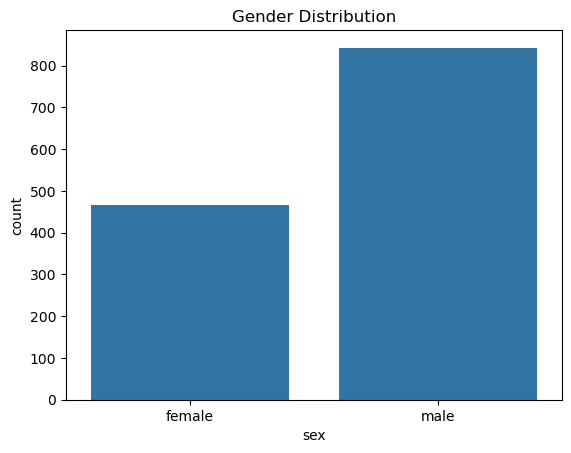

In [18]:
print(df['sex'].value_counts())
sns.countplot(data=df, x='sex') 
plt.title('Gender Distribution')
plt.show()

### b. Analiza rozkładu wiekowego 

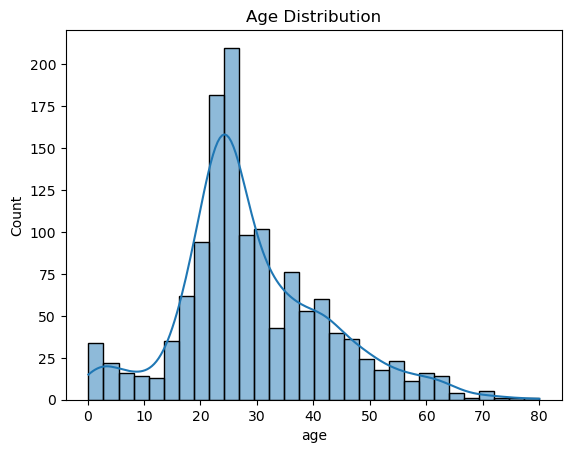

In [27]:
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

### c. Histogram korelacji wieku z stosunku do płci

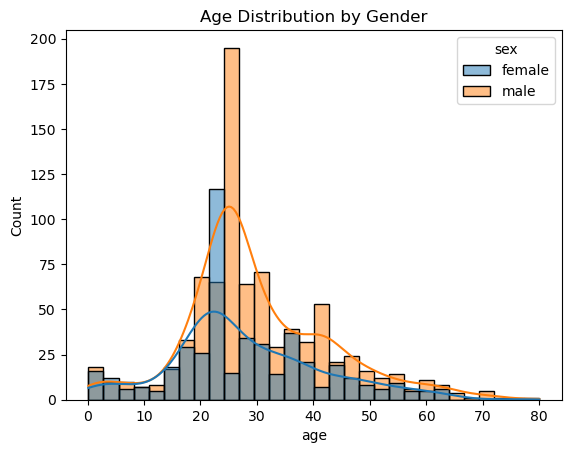

In [28]:
sns.histplot(df, x='age', hue='sex', bins=30, kde=True)
plt.title('Age Distribution by Gender')
plt.show()

In [49]:
df['age_group'] = pd.cut(df['age'], bins=range(0, int(df['age'].max()) + 5, 5))
counts = df.groupby(['age_group', 'sex']).size().unstack(fill_value=0)
print(counts)

sex        female  male
age_group              
(0, 5]         28    28
(5, 10]        13    17
(10, 15]       15    14
(15, 20]       53    80
(20, 25]       69   126
(25, 30]       57   109
(30, 35]       39    76
(35, 40]       36    59
(40, 45]       26    46
(45, 50]       20    40
(50, 55]       14    22
(55, 60]       11    15
(60, 65]        6    17
(65, 70]        0     4
(70, 75]        0     4
(75, 80]        1     1


## **5. ANALIZA RELACJI MIĘDZY ZMIENNYMI**

### a. Rzkład pasażerów według klas na Titanic

In [29]:
df['pclass'].value_counts() 

3.0    709
1.0    323
2.0    277
Name: pclass, dtype: int64

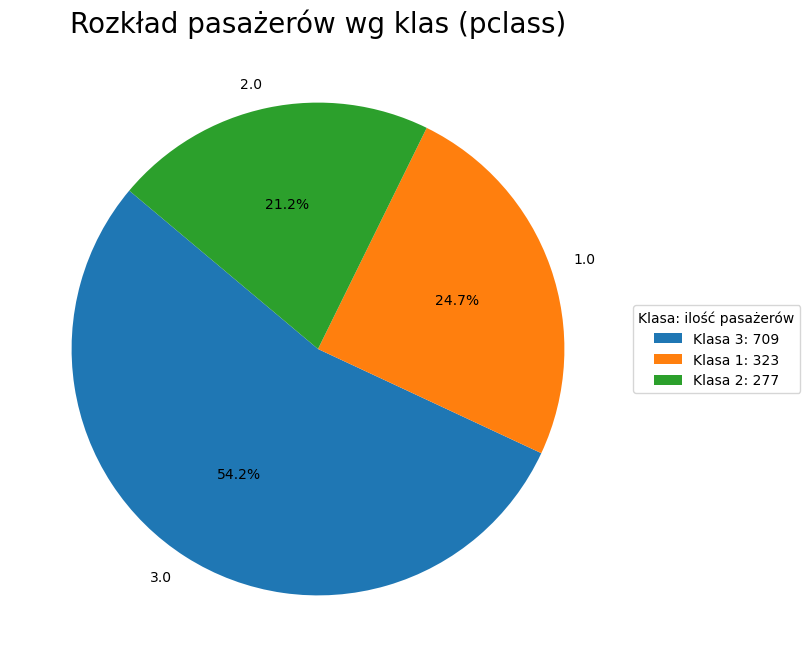

In [30]:
df = df
pclass_c = df['pclass'].value_counts()

legend_labels = [f'Klasa {int(index)}: {count}' for index, count in pclass_c.items()]

plt.figure(figsize=(8, 8))
plt.pie(pclass_c, labels=pclass_c.index, autopct='%1.1f%%', startangle=140 )
plt.title('Rozkład pasażerów wg klas (pclass)', fontsize=20)
plt.legend(legend_labels, title="Klasa: ilość pasażerów", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

### b. Wskaźnik przeżywalności według wieku 

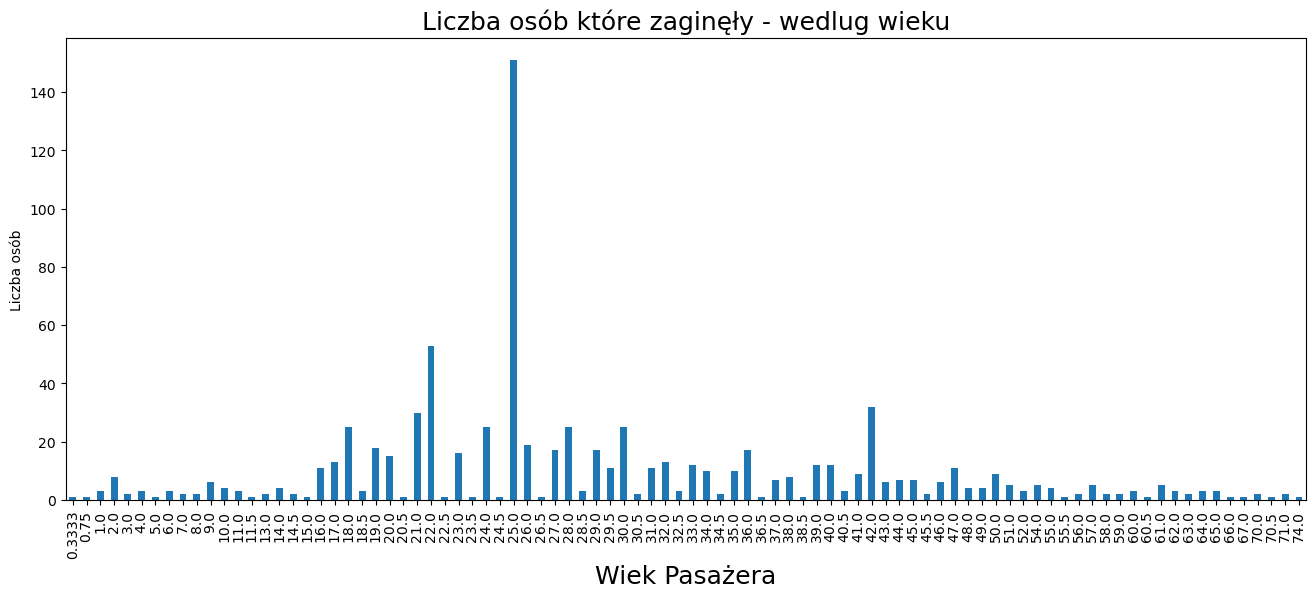

In [56]:
survived_age = df[df['survived'] == 0].groupby(['age']).size()

fig, ax = plt.subplots(figsize=(16, 6))
survived_age.plot(kind='bar', ax=ax)
plt.title('Liczba osób które zaginęły - wedlug wieku', fontsize=18)
plt.xlabel('Wiek Pasażera', fontsize=18)
plt.ylabel('Liczba osób')
plt.show()

### c. Przeżywalność w zależności od płci

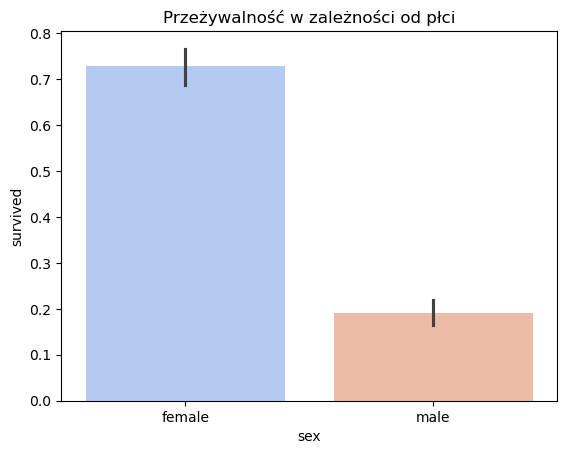

In [37]:
sns.barplot(x="sex", y="survived", hue="sex", data=df, palette="coolwarm", legend=False)
plt.title("Przeżywalność w zależności od płci")
plt.show()

### d. Wskaźnik przeżywalności według wielkości rodziny 

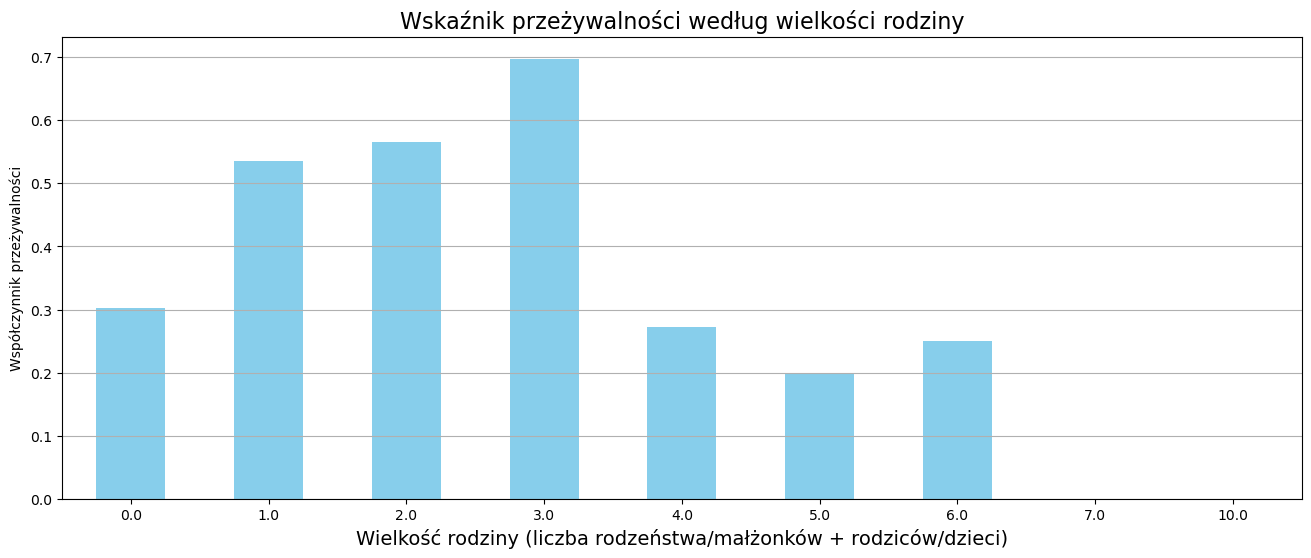

In [52]:
#  Tworzenie nowej kolumny „family_size”, która jest sumą „sibsp” i „parch”
df['family_size'] = df['sibsp'] + df['parch']

# Grupowanie według „wielkości rodziny” z obliczeniem średniego wskaźnika przeżycia
sur_by_fam_s = df.groupby('family_size')['survived'].mean()

# Wykres
plt.figure(figsize=(16, 6))
sur_by_fam_s.plot(kind='bar', color='skyblue')
plt.title('Wskaźnik przeżywalności według wielkości rodziny', fontsize=16)
plt.xlabel('Wielkość rodziny (liczba rodzeństwa/małżonków + rodziców/dzieci)', fontsize=14)
plt.ylabel('Współczynnik przeżywalności')
plt.xticks(rotation=0)
plt.grid(axis='y')

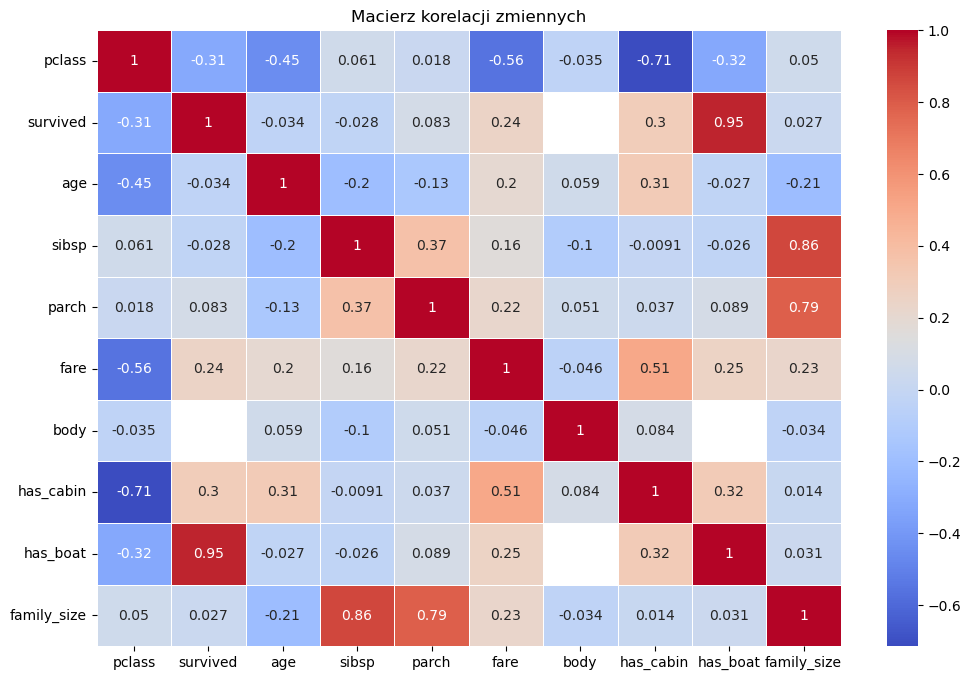

In [58]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Macierz korelacji zmiennych")
plt.show()

## **WNIOSKI KOŃCOWE:** 
### Obserwacje demograficzne i korelacyjne
#### W analizowanym zbiorze danych znalazło się 1309 pasażerów, z czego 500 osób przeżyło katastrofę RMS Titanic.

#### Liczba mężczyzn była niemal dwukrotnie wyższa niż liczba kobiet, co wpływa na zaburzenie korelacji między płcią a przeżyciem – mimo że w liczbach bezwzględnych więcej mężczyzn przeżyło, to procentowo kobiety miały znacznie wyższe szanse przeżycia.

#### Największą grupę stanowili pasażerowie trzeciej klasy, co wskazuje na znaczną liczbę osób z niższych warstw społecznych na pokładzie.

#### Najwięcej pasażerów znajdowało się w przedziale wiekowym 24–32 lata.

#### Osoby powyżej 65. roku życia były nieliczne, co może wynikać z ograniczeń zdrowotnych lub finansowych w podróżowaniu transatlantyckim.

#### W rejsie brały udział także dzieci, w tym niemowlęta oraz osoby do 18. roku życia.

#### Najwięcej ocalonych było w wieku 30–36 lat, co może wskazywać na większą sprawność fizyczną lub większe szanse przypisania do łodzi ratunkowych.

#### **Największa liczba ofiar śmiertelnych przypadała na osoby w wieku około 30 lat – prawdopodobnie dlatego, że był to dominujący przedział wiekowy wśród wszystkich pasażerów**.